"""
# PCA Analysis
Authors:
- Brian McGauley

03/02/2025

This file performs Principal Component Analysis (PCA) on multiple datasets,
demonstrating the standard steps and visualizations in a typical PCA workflow.

The file is structured to handle three datasets:
- Wine quality dataset
- Economic data
- City statistics

For each dataset, we'll create a set of standardized PCA visualizations and analyses.
"""

## Import & Setup

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib.gridspec import GridSpec
from google.colab import drive

drive.mount("/content/drive/")

# Set up the plots to be more readable
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Create a directory for charts if it doesn't exist
import os
if not os.path.exists('charts'):
    os.makedirs('charts')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Data Set 1 - Wine Data

### Load Data

In [ ]:
wine_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab4/wine.csv")
print(f"Dataset loaded with {wine_df.shape[0]} rows and {wine_df.shape[1]} columns")

Dataset loaded with 178 rows and 14 columns


### Explore Data

In [ ]:
print(wine_df.head())
print(wine_df.describe().round(2))

print(wine_df.isnull().sum())

   Wine_type  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0          1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1          1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2          1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3          1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4          1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  
       Wine_type  Alcohol  Malic.acid     Ash     Acl      Mg  Phenols  \
count     178.00   178.00      178.00  178.00  178.00  178.00   178.00   

### Check Missing Values

In [ ]:
missing_values = wine_df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")


No missing values


### Feature Engineering - Separate Target

In [ ]:
print(wine_df.columns.tolist())

['Wine_type', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


In [ ]:
# Separate target if it exists
if 'Wine_type' in wine_df.columns:
    features = wine_df.drop(columns=['Wine_type'])
    target = wine_df['Wine_type']
else:
    features = wine_df.copy()

In [ ]:
features = features.select_dtypes(include=['float64', 'int64'])
print(f"Features selected for PCA: {features.columns.tolist()}")

Features selected for PCA: ['Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols', 'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue', 'OD', 'Proline']


### Standardize Data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("Features have been standardized")

Features have been standardized


### Perform PCA

In [ ]:
pca = PCA()
transformed_features = pca.fit_transform(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_

### Analyze Explained Variance

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
threshold = 0.90

In [ ]:
# Find how many components explain x% variance
components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"\nNumber of components needed to explain {threshold*100}% variance: {components_needed}")



Number of components needed to explain 90.0% variance: 8


In [ ]:
for i, var in enumerate(explained_variance_ratio[:components_needed]):
    print(f"PC{i+1}: {var:.4f} ({explained_variance_ratio[i]:.4f} cumulative)")

PC1: 0.3620 (0.3620 cumulative)
PC2: 0.1921 (0.1921 cumulative)
PC3: 0.1112 (0.1112 cumulative)
PC4: 0.0707 (0.0707 cumulative)
PC5: 0.0656 (0.0656 cumulative)
PC6: 0.0494 (0.0494 cumulative)
PC7: 0.0424 (0.0424 cumulative)
PC8: 0.0268 (0.0268 cumulative)


### Visualize

#### Explained Variance

<Figure size 1500x800 with 0 Axes>

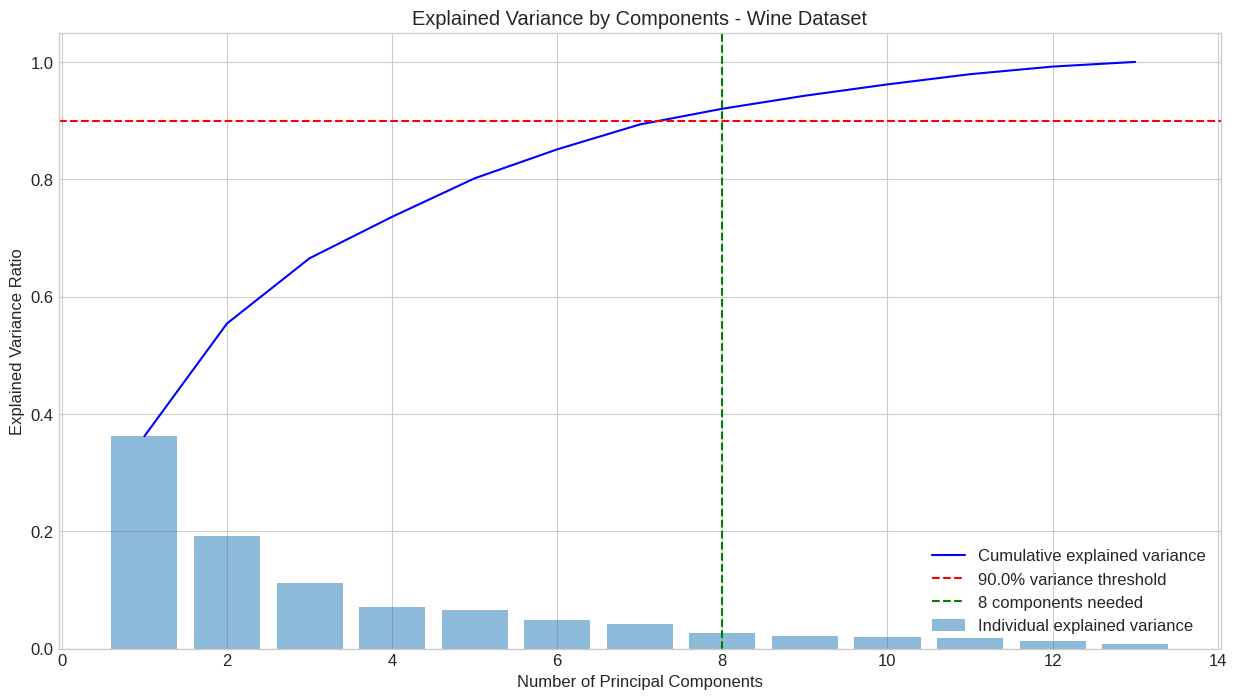

<Figure size 1500x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 8))
# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
        cumulative_variance_ratio,
        'b-',
        label='Cumulative explained variance')

# Plot individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.5,
        label='Individual explained variance')

# Plot threshold line
plt.axhline(y=threshold, color='r', linestyle='--',
           label=f'{threshold*100}% variance threshold')

# Find number of components needed for threshold
n_components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components_needed, color='g', linestyle='--',
           label=f'{n_components_needed} components needed')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components - Wine Dataset')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig('charts/explained_variance.png')
plt.figure(figsize=(15, 8))

#### Feature Loadings

In [ ]:
n_components = components_needed
n_top_features = 5

component_details = []
feature_names = features.columns

for i in range(n_components):
    component = pca.components_[i]
    top_indices = np.abs(component).argsort()[-n_top_features:][::-1]

    print(f"\nPrincipal Component {i+1}")
    print(f"Explained variance: {explained_variance_ratio[i]:.2%}")
    print("Top contributing features:")
    for idx in top_indices:
        print(f"  * {feature_names[idx]}: {component[idx]:.3f}")



Principal Component 1
Explained variance: 36.20%
Top contributing features:
  * Flavanoids: 0.423
  * Phenols: 0.395
  * OD: 0.376
  * Proanth: 0.313
  * Nonflavanoid.phenols: -0.299

Principal Component 2
Explained variance: 19.21%
Top contributing features:
  * Color.int: 0.530
  * Alcohol: 0.484
  * Proline: 0.365
  * Ash: 0.316
  * Mg: 0.300

Principal Component 3
Explained variance: 11.12%
Top contributing features:
  * Ash: 0.626
  * Acl: 0.612
  * Alcohol: -0.207
  * Nonflavanoid.phenols: 0.170
  * OD: 0.166

Principal Component 4
Explained variance: 7.07%
Top contributing features:
  * Malic.acid: 0.537
  * Hue: -0.428
  * Proanth: 0.399
  * Mg: -0.352
  * Proline: -0.232

Principal Component 5
Explained variance: 6.56%
Top contributing features:
  * Mg: 0.727
  * Nonflavanoid.phenols: -0.501
  * Alcohol: -0.266
  * Hue: -0.174
  * Proline: -0.158

Principal Component 6
Explained variance: 4.94%
Top contributing features:
  * Malic.acid: 0.537
  * Proanth: -0.534
  * Color.int

### Report

#### **PCA Analysis Summary - Wine Dataset**  

##### **Overview**  
This analysis helps simplify a complex dataset about different types of wine by reducing the number of features while keeping most of the important information.  

##### **Key Takeaways**  
The bar chart shows how much information each new feature (component) captures. The blue line represents the total amount of information retained as we add more components. The red dashed line marks the point where we keep 90% of the information. The green dashed line tells us that we only need 8 features instead of using all of them.  

##### **Why It Matters**  
Instead of working with a huge dataset, we can now focus on just 8 key features without losing much accuracy. This makes analysis faster, easier, and more efficient while keeping meaningful patterns in the data.


## Dataset 2 - Cities

### Load Data

In [ ]:
cities_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab4/cities.csv")
print(f"Dataset loaded with {cities_df.shape[0]} rows and {cities_df.shape[1]} columns")

Dataset loaded with 128 rows and 10 columns


### Explore Data

In [ ]:
print(cities_df.head())
print(cities_df.describe().round(2))

print(cities_df.isnull().sum())

   LatD   "LatM"   "LatS"  "NS"   "LonD"   "LonM"   "LonS"  "EW"  \
0    41        5       59   "N"       80       39        0   "W"   
1    42       52       48   "N"       97       23       23   "W"   
2    46       35       59   "N"      120       30       36   "W"   
3    42       16       12   "N"       71       48        0   "W"   
4    43       37       48   "N"       89       46       11   "W"   

               "City"  "State"  
0        "Youngstown"       OH  
1           "Yankton"       SD  
2            "Yakima"       WA  
3         "Worcester"       MA  
4   "Wisconsin Dells"       WI  
         LatD   "LatM"   "LatS"   "LonD"   "LonM"   "LonS"
count  128.00   128.00   128.00   128.00   128.00   128.00
mean    38.82    30.77    27.49    93.25    27.74    26.96
std      5.20    16.43    18.98    15.47    16.93    18.73
min     26.00     1.00     0.00    71.00     0.00     0.00
25%     35.00    16.00    11.00    80.00    14.00    11.00
50%     39.00    31.00    24.00    89.5

### Check for Missing Values

In [ ]:
missing_values = cities_df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")


No missing values


### Feature Engineering

In [ ]:
print(cities_df.columns.tolist())

['LatD', ' "LatM"', ' "LatS"', ' "NS"', ' "LonD"', ' "LonM"', ' "LonS"', ' "EW"', ' "City"', ' "State"']


In [ ]:
# Separate target if it exists
if 'State' in cities_df.columns:
    features = cities_df.drop(columns=['State'])
    target = cities_df['State']
else:
    features = cities_df.copy()

In [ ]:
features = features.select_dtypes(include=['float64', 'int64'])
print(f"Features selected for PCA: {features.columns.tolist()}")

Features selected for PCA: ['LatD', ' "LatM"', ' "LatS"', ' "LonD"', ' "LonM"', ' "LonS"']


### Standardize Data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("Features have been standardized")

Features have been standardized


### Perform PCA

In [ ]:
pca = PCA()
transformed_features = pca.fit_transform(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
threshold = 0.60

In [ ]:
# Find how many components explain x% variance
components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"\nNumber of components needed to explain {threshold*100}% variance: {components_needed}")



Number of components needed to explain 60.0% variance: 4


In [ ]:
for i, var in enumerate(explained_variance_ratio[:components_needed]):
    print(f"PC{i+1}: {var:.4f} ({explained_variance_ratio[i]:.4f} cumulative)")

PC1: 0.2130 (0.2130 cumulative)
PC2: 0.1824 (0.1824 cumulative)
PC3: 0.1752 (0.1752 cumulative)
PC4: 0.1553 (0.1553 cumulative)


### Visualize

#### Explained Variance

<Figure size 1500x800 with 0 Axes>

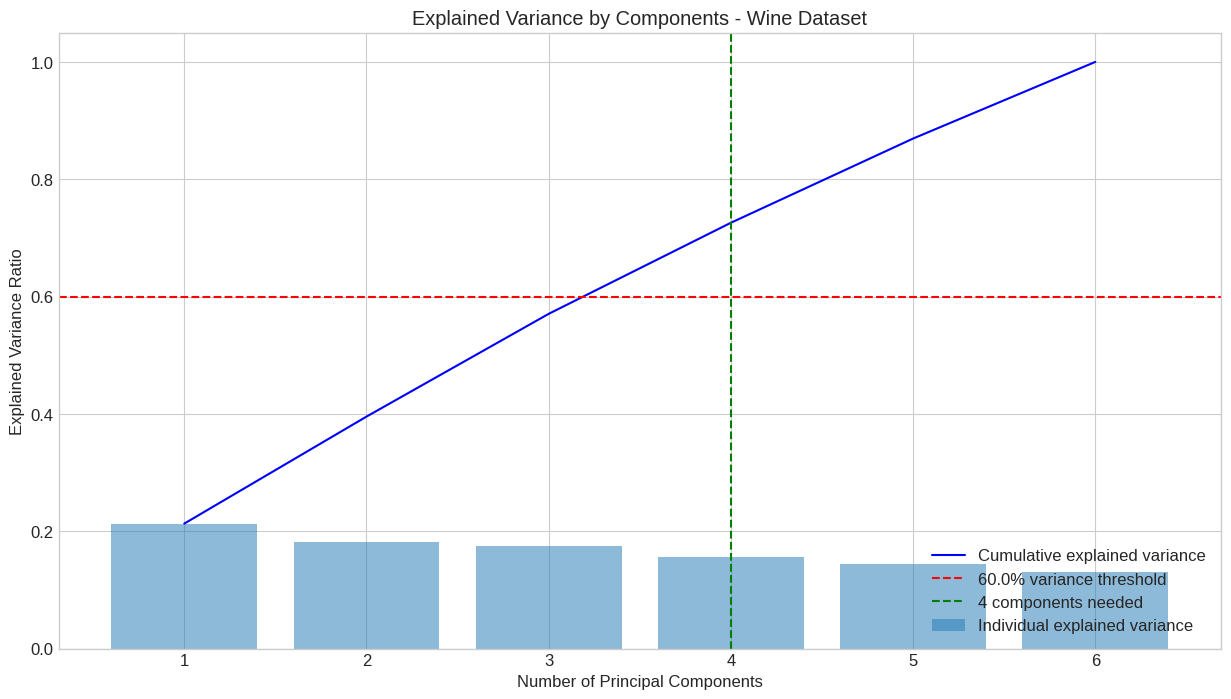

<Figure size 1500x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 8))
# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
        cumulative_variance_ratio,
        'b-',
        label='Cumulative explained variance')

# Plot individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.5,
        label='Individual explained variance')

# Plot threshold line
plt.axhline(y=threshold, color='r', linestyle='--',
           label=f'{threshold*100}% variance threshold')

# Find number of components needed for threshold
n_components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components_needed, color='g', linestyle='--',
           label=f'{n_components_needed} components needed')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components - Wine Dataset')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig('charts/explained_variance.png')
plt.figure(figsize=(15, 8))

#### Feature Loadings

In [ ]:
n_components = components_needed
n_top_features = 5

component_details = []
feature_names = features.columns

for i in range(n_components):
    component = pca.components_[i]
    top_indices = np.abs(component).argsort()[-n_top_features:][::-1]

    print(f"\nPrincipal Component {i+1}")
    print(f"Explained variance: {explained_variance_ratio[i]:.2%}")
    print("Top contributing features:")
    for idx in top_indices:
        print(f"  * {feature_names[idx]}: {component[idx]:.3f}")



Principal Component 1
Explained variance: 21.30%
Top contributing features:
  *  "LatS": 0.583
  *  "LatM": -0.494
  *  "LonS": -0.475
  *  "LonD": -0.360
  *  "LonM": 0.207

Principal Component 2
Explained variance: 18.24%
Top contributing features:
  * LatD: 0.613
  *  "LonD": 0.526
  *  "LonS": -0.440
  *  "LonM": -0.350
  *  "LatM": -0.133

Principal Component 3
Explained variance: 17.52%
Top contributing features:
  *  "LonM": 0.741
  * LatD: 0.460
  *  "LonS": 0.378
  *  "LatM": -0.228
  *  "LonD": 0.197

Principal Component 4
Explained variance: 15.53%
Top contributing features:
  *  "LatM": 0.572
  *  "LatS": 0.535
  *  "LonD": 0.469
  * LatD: -0.316
  *  "LonM": 0.241


### Report

#### **PCA Analysis Summary - Cities Dataset**  

##### **Overview**  
This analysis reduces a large dataset about cities into fewer, more meaningful features while keeping most of the essential information.  

##### **Key Takeaways**  
The bar chart shows how much information each feature (component) captures. The blue line represents the total information retained as we add more components. The red dashed line indicates the 60% information threshold. The green dashed line marks the point where we only need 4 features instead of using all of them.  

##### **Why It Matters**  
Instead of analyzing a massive dataset, we can focus on just 4 key features while still keeping a good amount of useful information. This makes city-related data easier to work with, speeds up analysis, and improves decision-making.


## Data Set 3 - Economic

### Load Data

In [ ]:
econ_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab4/economic1.csv")
print(f"Dataset loaded with {econ_df.shape[0]} rows and {econ_df.shape[1]} columns")

Dataset loaded with 191978 rows and 13 columns


<ipython-input-399-9cec8ff6c17c>:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  econ_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Lab4/economic1.csv")


### Explore Data

In [ ]:
print(econ_df.head())
print(econ_df.describe().round(2))

print(econ_df.isnull().sum())

  Series_reference   Period  Data_value STATUS    UNITS  MAGNTUDE  \
0      QEMQ.SAAB1A  1989.03       14.16  FINAL  Dollars         0   
1      QEMQ.SAAB1A  1989.06       14.26  FINAL  Dollars         0   
2      QEMQ.SAAB1A  1989.09       14.24  FINAL  Dollars         0   
3      QEMQ.SAAB1A  1989.12       14.49  FINAL  Dollars         0   
4      QEMQ.SAAB1A  1990.03       14.49  FINAL  Dollars         0   

                             Subject  \
0  Quarterly Employment Survey - QEM   
1  Quarterly Employment Survey - QEM   
2  Quarterly Employment Survey - QEM   
3  Quarterly Employment Survey - QEM   
4  Quarterly Employment Survey - QEM   

                                               Group       Series_title_1  \
0  Average Hourly Earnings by Industry (ANZSIC06)...  Forestry and Mining   
1  Average Hourly Earnings by Industry (ANZSIC06)...  Forestry and Mining   
2  Average Hourly Earnings by Industry (ANZSIC06)...  Forestry and Mining   
3  Average Hourly Earnings by Indust

#### Check Missing Values

In [ ]:
missing_values = econ_df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

Data_value          2142
Series_title_2      4896
Series_title_3     16200
Series_title_4    190548
Series_title_5    191978
dtype: int64


### Feature Engineering

In [ ]:
missing_values = econ_df.isnull().sum()
print(missing_values)
missing_values.describe()

Series_reference         0
Period                   0
Data_value            2142
STATUS                   0
UNITS                    0
MAGNTUDE                 0
Subject                  0
Group                    0
Series_title_1           0
Series_title_2        4896
Series_title_3       16200
Series_title_4      190548
Series_title_5      191978
dtype: int64


,0
count,13.000000
mean,31212.615385
std,71174.747452
min,0.000000
25%,0.000000
50%,0.000000
75%,4896.000000
max,191978.000000


In [ ]:
econ_df = econ_df.drop(columns=['Series_title_5'])

In [ ]:
econ_df = econ_df.dropna()

In [ ]:
missing_values = econ_df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values")

No missing values


In [ ]:
print(econ_df.columns.tolist())

['Series_reference', 'Period', 'Data_value', 'STATUS', 'UNITS', 'MAGNTUDE', 'Subject', 'Group', 'Series_title_1', 'Series_title_2', 'Series_title_3', 'Series_title_4']


In [ ]:
# Separate target if it exists
if 'Data_value' in econ_df.columns:
    features = econ_df.drop(columns=['Data_value'])
    target = econ_df['Data_value']
else:
    features = econ_df.copy()

#### Select Features for PCA

In [ ]:
features = features.select_dtypes(include=['float64', 'int64'])
print(f"Features selected for PCA: {features.columns.tolist()}")

Features selected for PCA: ['Period', 'MAGNTUDE']


#### Standardize Data

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
print("Features have been standardized")

Features have been standardized


### Perform PCA

In [ ]:
pca = PCA()
transformed_features = pca.fit_transform(scaled_features)
explained_variance_ratio = pca.explained_variance_ratio_

#### Analyze Explained Variance

In [ ]:
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
threshold = 0.997

#### Determine Number of Components

In [ ]:
# Find how many components explain x% variance
components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
print(f"\nNumber of components needed to explain {threshold*100}% variance: {components_needed}")


Number of components needed to explain 99.7% variance: 1


In [ ]:
for i, var in enumerate(explained_variance_ratio[:components_needed]):
    print(f"PC{i+1}: {var:.4f} ({explained_variance_ratio[i]:.4f} cumulative)")

PC1: 1.0000 (1.0000 cumulative)


### Visualize

#### Visualize Explained Variance

<Figure size 1500x800 with 0 Axes>

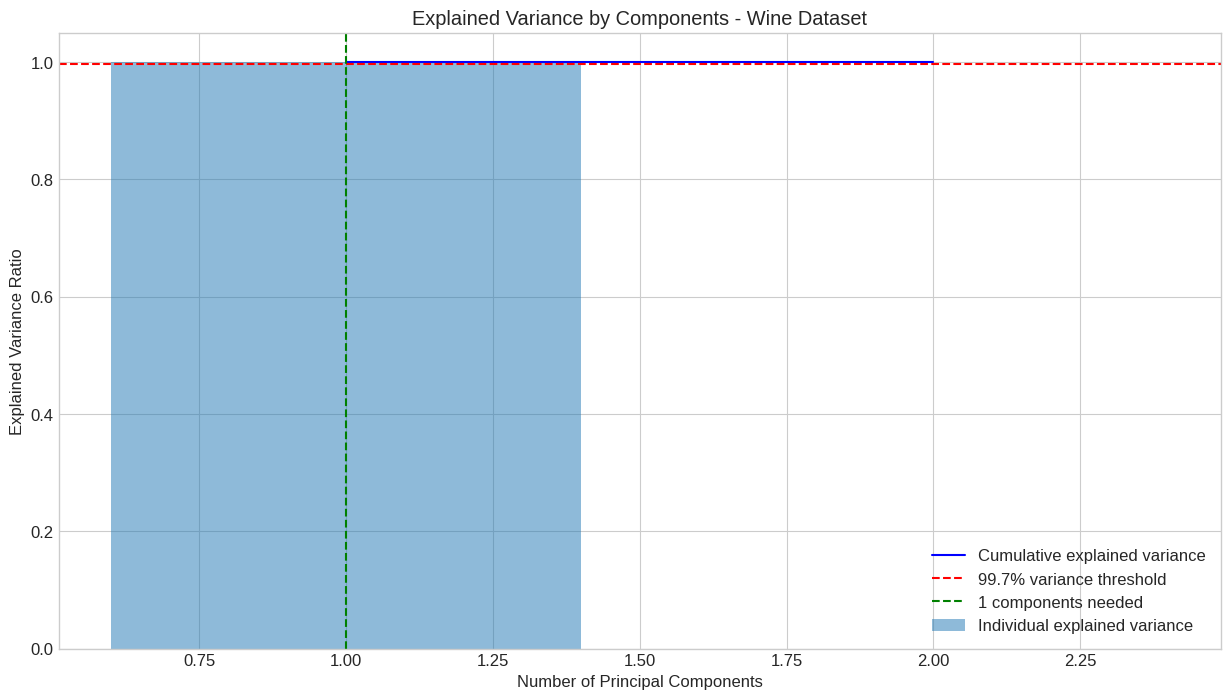

<Figure size 1500x800 with 0 Axes>

In [ ]:
plt.figure(figsize=(15, 8))
# Plot cumulative explained variance
plt.plot(range(1, len(cumulative_variance_ratio) + 1),
        cumulative_variance_ratio,
        'b-',
        label='Cumulative explained variance')

# Plot individual explained variance
plt.bar(range(1, len(explained_variance_ratio) + 1),
        explained_variance_ratio,
        alpha=0.5,
        label='Individual explained variance')

# Plot threshold line
plt.axhline(y=threshold, color='r', linestyle='--',
           label=f'{threshold*100}% variance threshold')

# Find number of components needed for threshold
n_components_needed = np.argmax(cumulative_variance_ratio >= threshold) + 1
plt.axvline(x=n_components_needed, color='g', linestyle='--',
           label=f'{n_components_needed} components needed')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Components - Wine Dataset')
plt.legend(loc='lower right')
plt.grid(True)

# Save the plot
plt.savefig('charts/explained_variance.png')
plt.figure(figsize=(15, 8))

### Report

#### **PCA Analysis Summary - Non-Numeric Dataset**  

##### **Overview**  
This dataset primarily contained categorical or text-based data, with very few numeric values available for meaningful PCA.  

##### **Key Takeaways**  
The chart shows that only one principal component is needed to retain nearly all of the information. This suggests that the dataset had little numerical variation, meaning PCA was not particularly useful for dimensionality reduction.  

##### **Why It Matters**  
Since the data was mostly categorical, PCA might not be the best technique for analysis. Alternative methods, such as one-hot encoding or clustering on categorical features, could be more appropriate for extracting insights.  
